# Introduction

In [ ]:
# Clone repo containing MNIST data and the neural network modules
!git clone -b master https://github.com/papir805/Stanford-ML-Class.git

## Important Python Libraries for Data Science

In [3]:
# For organizing and manipulating data
import numpy as np

# For Plotting
import matplotlib.pyplot as plt
import cv2

# Importing Custom Modules for Neural Networks and Working with MNIST

In [101]:
# Used to identify file paths for our datasets and custom modules
import os
import sys

# Specify path of cloned GitHub directory
gh_dir = os.getcwd()+'/Stanford-ML-Class'

# # Specify Python should look at the parent directory
# # to import custom modules
# sys.path.insert(0, '../')

# Specify Python should look at the cloned gh directory
# to import custom modules
sys.path.insert(0, gh_dir)

# Import custom neural network modules
from neural_network_scripts import mnist_loader, network, image_processing, for_visualizations

In [5]:
# import importlib
# importlib.reload(network)
# importlib.reload(image_processing)

# Read Data

In [6]:
# Load dataset
data_path = "../data/mnist.pkl.gz"

# Load training data.  Testing data isn't needed for this notebook
training_data, _, _ = \
mnist_loader.load_data_wrapper(data_path)

# Visualizing the Dataset

In [7]:
# Set colors for future visualizations
five_color = "orange"
zero_color = "blue"

### The First Digit is a 5

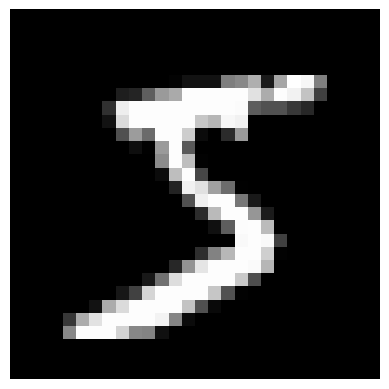

In [8]:
first_digit = training_data[0][0]

image_processing.print_image(first_digit)

#### Grayscale Values as a Function of Pixel Index

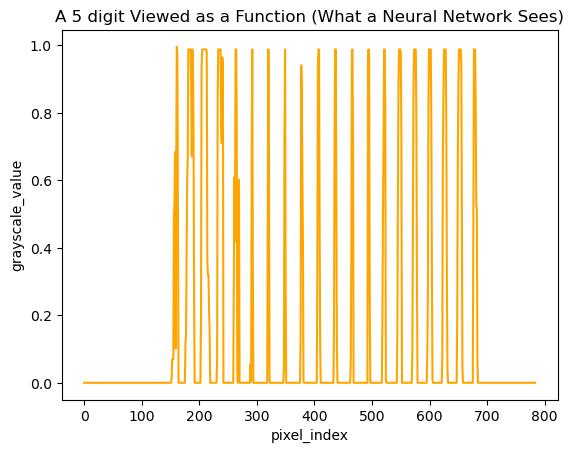

In [9]:
fig, ax = plt.subplots(1,1)
ax.plot(np.arange(0, 784, 1), first_digit.reshape(784), color=five_color)
ax.set_title("A 5 digit Viewed as a Function (What a Neural Network Sees)")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value');

### The Second Digit is a 0

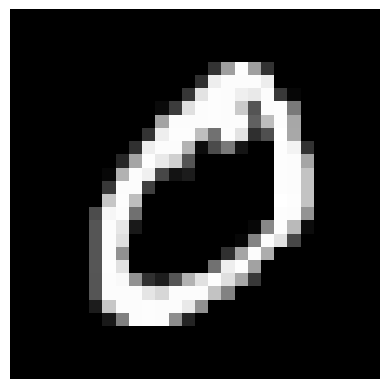

In [10]:
second_digit = training_data[1][0]

image_processing.print_image(second_digit.reshape(28,28))

#### Grayscale Values as a Function of Pixel Index

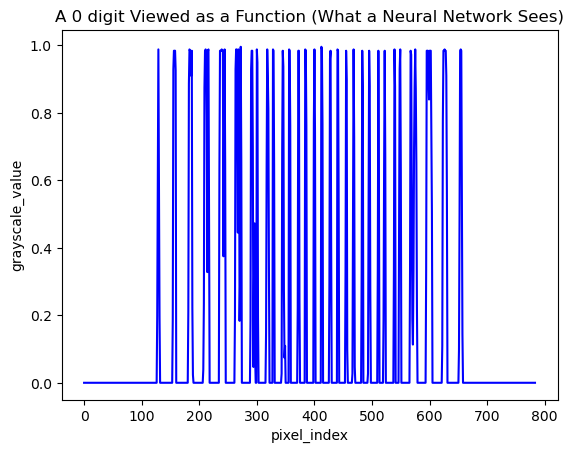

In [11]:
fig, ax = plt.subplots(1,1)
ax.plot(np.arange(0, 784, 1), second_digit.reshape(784), color=zero_color)
ax.set_title("A 0 digit Viewed as a Function (What a Neural Network Sees)")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value');

## Several Fives

In [12]:
fives = list()

for sample in training_data:
    if sample[1][5] == 1:
        fives.append(sample[0])
    if len(fives) == 3:
        break

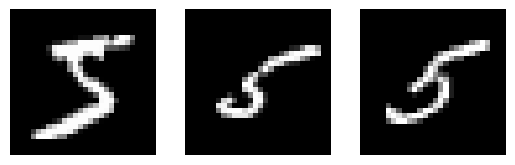

In [20]:
fig, ax = plt.subplots(1,3)

for i, five in enumerate(fives):
    image_processing.print_image(five.reshape(28, 28), ax = ax[i])

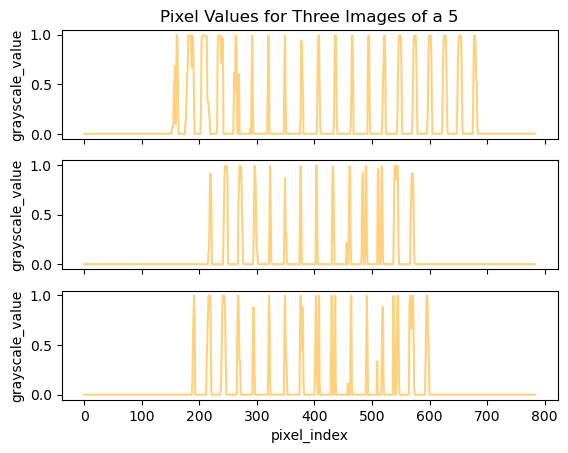

In [17]:
fig, ax = plt.subplots(3, 1, sharex = True)

for i, five in enumerate(fives):
    ax[i].plot(np.arange(0, 784, 1), five.reshape(784), color=five_color, alpha = 0.5)
    ax[i].set_ylabel('grayscale_value');
ax[0].set_title("Pixel Values for Three Images of a 5")
ax[2].set_xlabel('pixel_index');

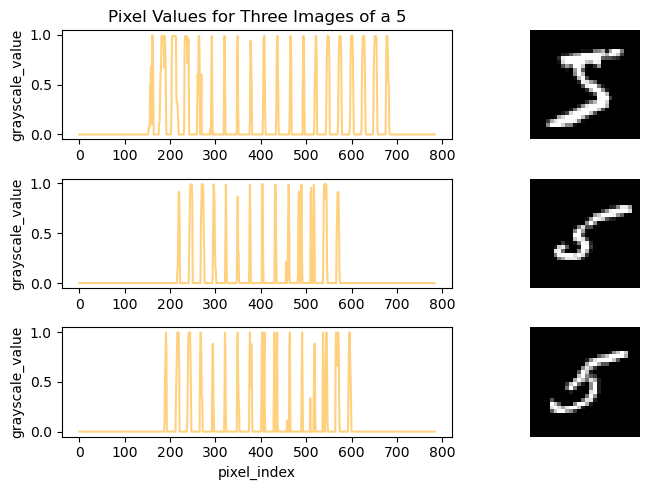

In [39]:
fig, ax = plt.subplots(3, 2, figsize=(8,5))

for i, five in enumerate(fives):
    ax[i][0].plot(np.arange(0, 784, 1), five.reshape(784), color=five_color, alpha = 0.5)
    ax[i][0].set_ylabel('grayscale_value')
    image_processing.print_image(five.reshape(28, 28), ax = ax[i][1])
ax[0][0].set_title("Pixel Values for Three Images of a 5")
ax[2][0].set_xlabel('pixel_index')
fig.tight_layout();

## Several Zeros

In [18]:
zeros = list()

for sample in training_data:
    if sample[1][0] == 1:
        zeros.append(sample[0])
    if len(zeros) == 3:
        break

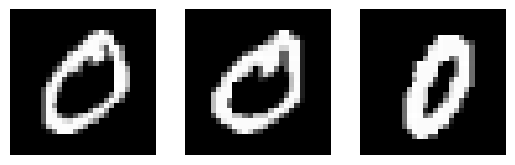

In [21]:
fig, ax = plt.subplots(1,3)

for i, zero in enumerate(zeros):
    image_processing.print_image(zero.reshape(28, 28), ax = ax[i])

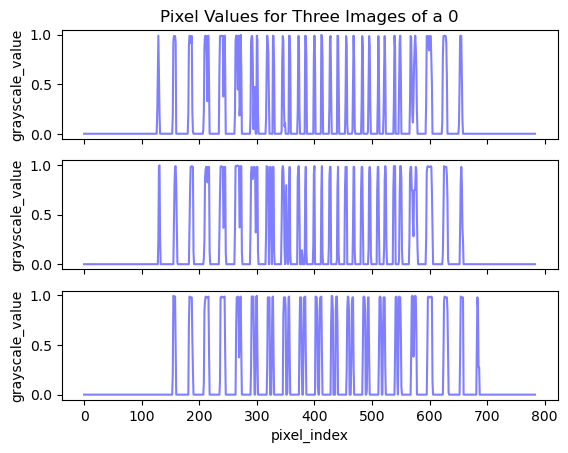

In [22]:
fig, ax = plt.subplots(3, 1, sharex = True)

for i, zero in enumerate(zeros):
    ax[i].plot(np.arange(0, 784, 1), zero.reshape(784), color=zero_color, alpha = 0.5)
    ax[i].set_ylabel('grayscale_value');
ax[0].set_title("Pixel Values for Three Images of a 0")
ax[2].set_xlabel('pixel_index');

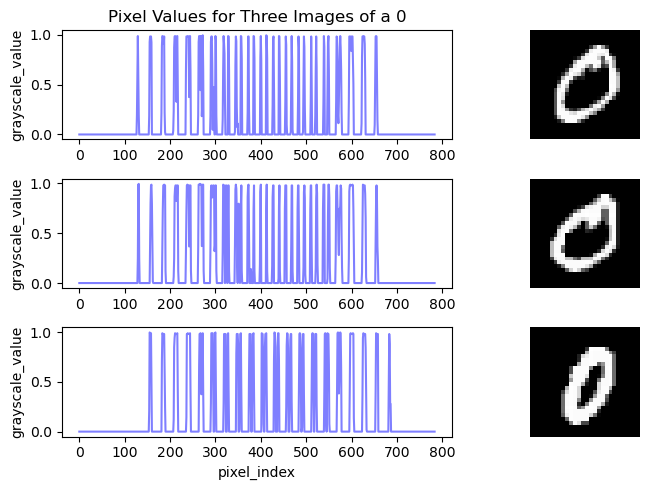

In [38]:
fig, ax = plt.subplots(3, 2, figsize=(8,5))

for i, zero in enumerate(zeros):
    ax[i][0].plot(np.arange(0, 784, 1), zero.reshape(784), color=zero_color, alpha = 0.5)
    ax[i][0].set_ylabel('grayscale_value')
    image_processing.print_image(zero.reshape(28, 28), ax = ax[i][1])
ax[0][0].set_title("Pixel Values for Three Images of a 0")
ax[2][0].set_xlabel('pixel_index')
fig.tight_layout();

## Comparing a Five and a Zero

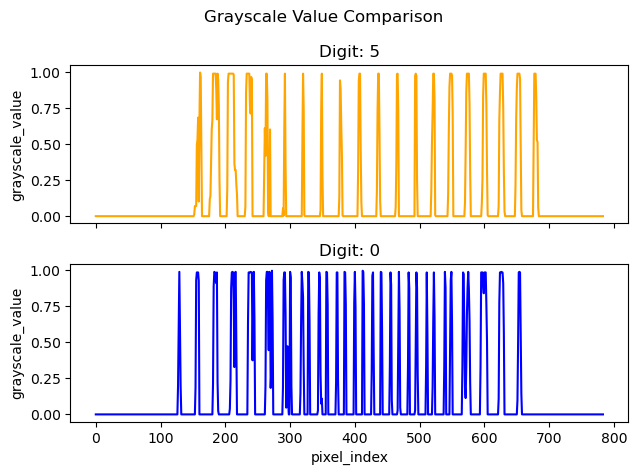

In [27]:
fig, ax = plt.subplots(2,1, sharex=True)

fig.suptitle('Grayscale Value Comparison')
ax[0].plot(np.arange(0, 784, 1), first_digit.reshape(784), color=five_color)
ax[0].set_title("Digit: 5")
# ax[0].set_xlabel('pixel_index')
ax[0].set_ylabel('grayscale_value')

ax[1].plot(np.arange(0, 784, 1), second_digit.reshape(784), color=zero_color)
ax[1].set_title("Digit: 0")
ax[1].set_xlabel('pixel_index')
ax[1].set_ylabel('grayscale_value')
plt.tight_layout();

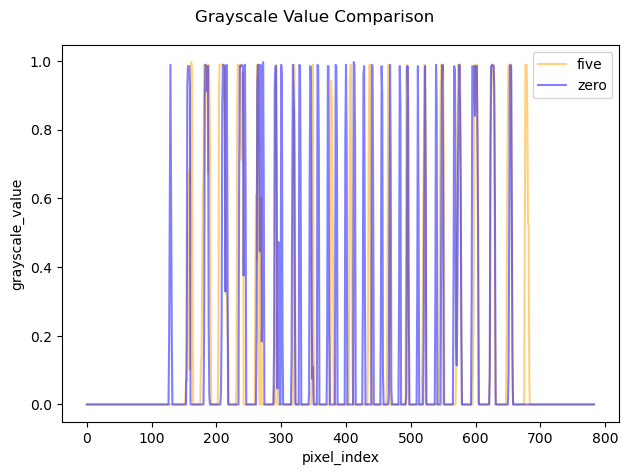

In [97]:
fig, ax = plt.subplots(1,1)

ax.plot(np.arange(0, 784, 1), first_digit.reshape(784), color=five_color, label='five', alpha=0.5)

ax.plot(np.arange(0, 784, 1), second_digit.reshape(784), color=zero_color, label='zero', alpha=0.5)

fig.suptitle('Grayscale Value Comparison')
#ax.set_title("Color values for a single 0 from the dataset")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value')
plt.legend()
plt.tight_layout();

### Zooming in on a Pixel Range

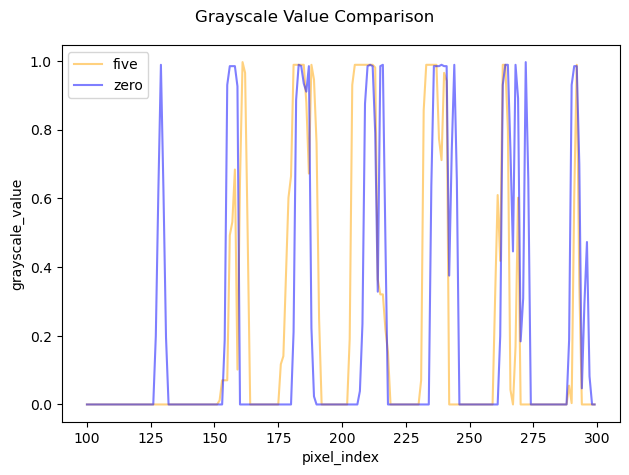

In [128]:
min_idx = 100
max_idx = 300
idx_range = np.arange(min_idx, max_idx, 1)
idx_diff = max_idx - min_idx

fig, ax = plt.subplots(1,1)

ax.plot(idx_range, first_digit[idx_range].reshape(idx_diff), color=five_color, label='five', alpha=0.5)

ax.plot(idx_range, second_digit[idx_range].reshape(idx_diff), color=zero_color, label='zero', alpha=0.5)

fig.suptitle('Grayscale Value Comparison')
#ax.set_title("Color values for a single 0 from the dataset")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value')
ax.legend(loc="upper left")
plt.tight_layout();

## Aggregating Grayscale Values

In [ ]:
# importlib.reload(network)
# importlib.reload(image_processing)
# importlib.reload(plotting)

In [148]:
images = for_visualizations.get_and_categorize_images(training_data)
fives = images[5]
zeros = images[0]

five_sums = np.array(fives).reshape(len(fives), 784).sum(axis=0)
zero_sums = np.array(zeros).reshape(len(zeros), 784).sum(axis=0)

five_avgs = np.array(fives).reshape(len(fives), 784).mean(axis=0)
zero_avgs = np.array(zeros).reshape(len(zeros), 784).mean(axis=0)

### Sum of Grayscale Values

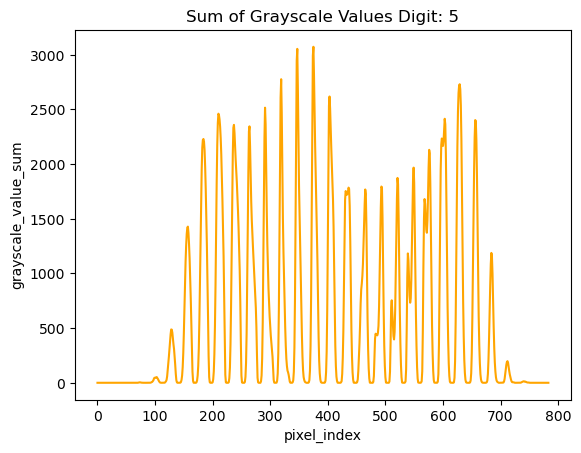

In [149]:
fig, ax = plt.subplots(1,1)

ax.plot(np.arange(0, 784, 1), five_sums, color=five_color)
ax.set_title("Sum of Grayscale Values Digit: 5")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value_sum');

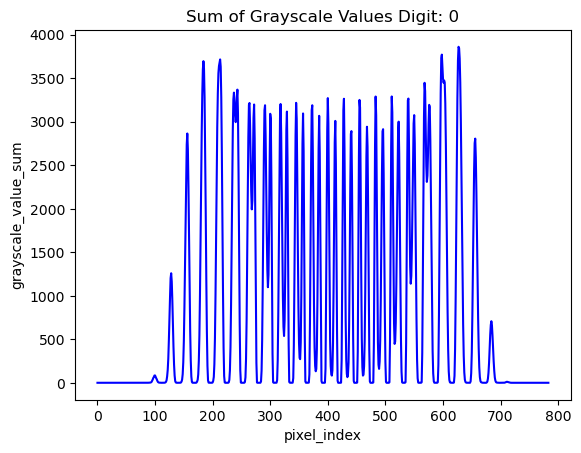

In [150]:
fig, ax = plt.subplots(1,1)

ax.plot(np.arange(0, 784, 1), zero_sums, color=zero_color)
ax.set_title("Sum of Grayscale Values Digit: 0")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value_sum');

#### Comparisons

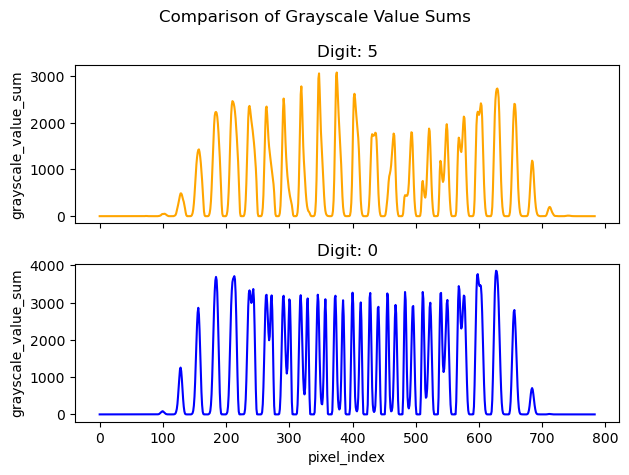

In [158]:
fig, ax = plt.subplots(2,1, sharex=True)

fig.suptitle('Comparison of Grayscale Value Sums')

ax[0].plot(np.arange(0, 784, 1), five_sums, color=five_color)
ax[0].set_title("Digit: 5")
#ax[0].set_xlabel('pixel_index')
ax[0].set_ylabel('grayscale_value_sum');

ax[1].plot(np.arange(0, 784, 1), zero_sums, color=zero_color)
ax[1].set_title("Digit: 0")
ax[1].set_xlabel('pixel_index')
ax[1].set_ylabel('grayscale_value_sum')
plt.tight_layout();

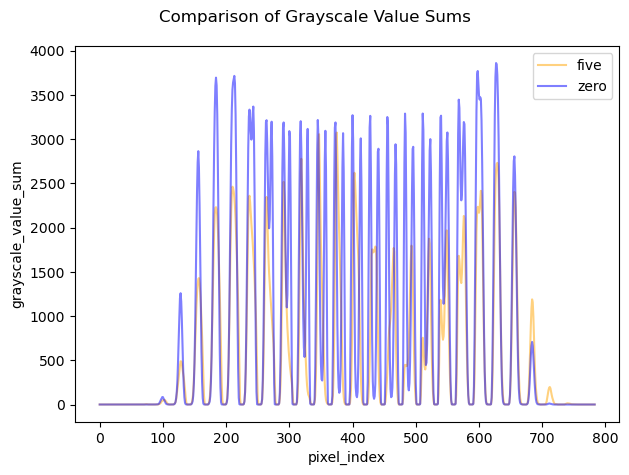

In [161]:
fig, ax = plt.subplots(1,1)

fig.suptitle('Comparison of Grayscale Value Sums')

ax.plot(np.arange(0, 784, 1), five_sums, label='five', color=five_color, alpha=0.5)
ax.plot(np.arange(0, 784, 1), zero_sums, label='zero', color=zero_color, alpha=0.5)
#ax.set_title("Color values for all zeros from the dataset")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value_sum')
plt.legend()
plt.tight_layout();

### Average Grayscale Values

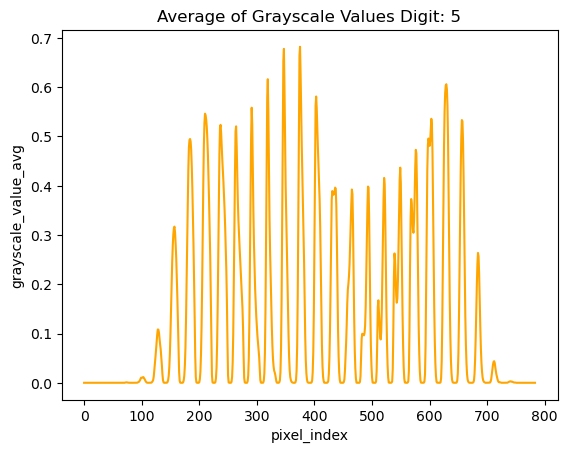

In [151]:
fig, ax = plt.subplots(1,1)

ax.plot(np.arange(0, 784, 1), five_avgs, color=five_color)
ax.set_title("Average of Grayscale Values Digit: 5")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value_avg');

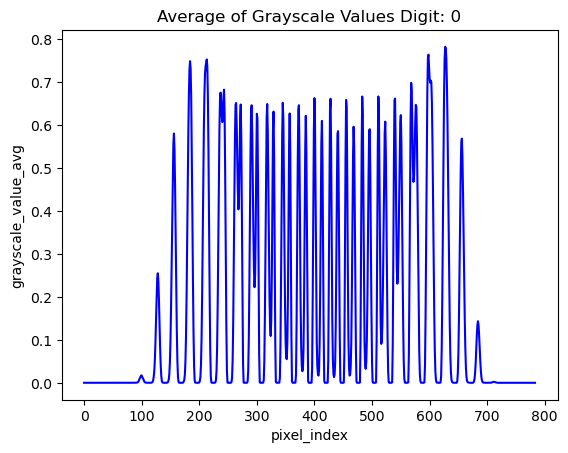

In [154]:
fig, ax = plt.subplots(1,1)

ax.plot(np.arange(0, 784, 1), zero_avgs, color=zero_color)
ax.set_title("Average of Grayscale Values Digit: 0")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value_avg');

#### Comparisons

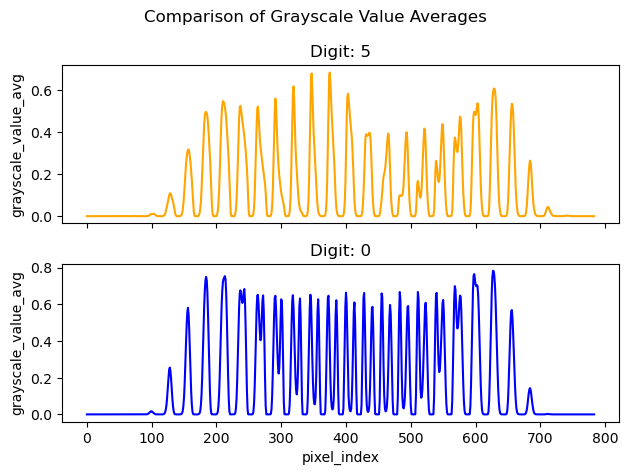

In [160]:
fig, ax = plt.subplots(2,1, sharex=True)

fig.suptitle('Comparison of Grayscale Value Averages')

ax[0].plot(np.arange(0, 784, 1), five_avgs, color=five_color)
ax[0].set_title("Digit: 5")
#ax[0].set_xlabel('pixel_index')
ax[0].set_ylabel('grayscale_value_avg');

ax[1].plot(np.arange(0, 784, 1), zero_avgs, color=zero_color)
ax[1].set_title("Digit: 0")
ax[1].set_xlabel('pixel_index')
ax[1].set_ylabel('grayscale_value_avg')
plt.tight_layout();

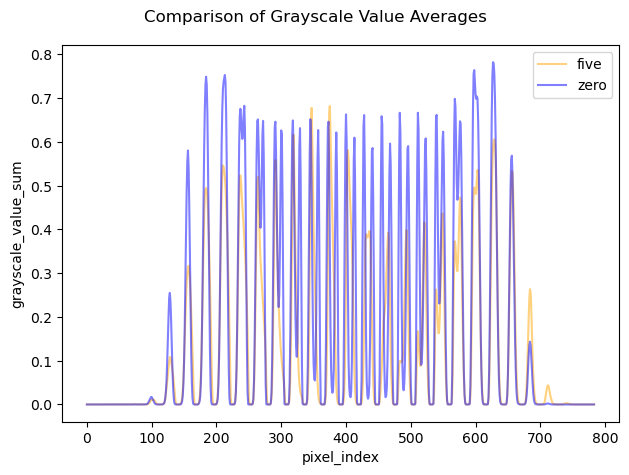

In [162]:
fig, ax = plt.subplots(1,1)

fig.suptitle('Comparison of Grayscale Value Averages')

ax.plot(np.arange(0, 784, 1), five_avgs, label='five', color=five_color, alpha=0.5)
ax.plot(np.arange(0, 784, 1), zero_avgs, label='zero', color=zero_color, alpha=0.5)
#ax.set_title("Color values for all zeros from the dataset")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value_sum')
plt.legend()
plt.tight_layout();

The end